In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plastic=pd.read_csv("PlasticSales.csv")
plastic.head()

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030


In [3]:
plastic.shape

(60, 2)

In [4]:
plastic['months']= 0

In [5]:
for i in range(60):
    p = plastic["Month"][i]
    plastic['months'][i]= p[0:3]

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [6]:
month_dummies = pd.DataFrame(pd.get_dummies(plastic['months']))

In [7]:
plastic1 = pd.concat([plastic,month_dummies],axis = 1)
plastic1.head()

,Month,Sales,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,Jan-49,742,Jan,0,0,0,0,1,0,0,0,0,0,0,0
1,Feb-49,697,Feb,0,0,0,1,0,0,0,0,0,0,0,0
2,Mar-49,776,Mar,0,0,0,0,0,0,0,1,0,0,0,0
3,Apr-49,898,Apr,1,0,0,0,0,0,0,0,0,0,0,0
4,May-49,1030,May,0,0,0,0,0,0,0,0,1,0,0,0


In [8]:
plastic1["t"] = np.arange(1,61)
plastic1.head()

,Month,Sales,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t
0,Jan-49,742,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1
1,Feb-49,697,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2
2,Mar-49,776,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3
3,Apr-49,898,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4
4,May-49,1030,May,0,0,0,0,0,0,0,0,1,0,0,0,5


In [9]:
plastic1["t_squared"] = plastic1["t"]*plastic1["t"]
plastic1.columns
plastic1.head()

,Month,Sales,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared
0,Jan-49,742,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,Feb-49,697,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4
2,Mar-49,776,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9
3,Apr-49,898,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16
4,May-49,1030,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25


In [10]:
plastic1["log_Sales"] = np.log(plastic1["Sales"])
plastic1.head()

,Month,Sales,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Sales
0,Jan-49,742,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,6.609349
1,Feb-49,697,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,6.546785
2,Mar-49,776,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,6.654153
3,Apr-49,898,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,6.800170
4,May-49,1030,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,6.937314


In [11]:
Train = plastic1.head(40)
Test = plastic1.tail(20)

In [12]:
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

248.9240026995544

In [13]:
Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

250.10705706123244

In [14]:
Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

495.46688215145764

In [15]:
add_sea = smf.ols('Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

263.23620175930745

In [16]:
add_sea_Quad = smf.ols('Sales~t+t_squared+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

118.23685739810237

In [17]:
Mul_sea = smf.ols('log_Sales~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

266.6198308649413

In [18]:
Mul_Add_sea = smf.ols('log_Sales~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

117.11496871635113

In [19]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,248.924003
1,rmse_Exp,250.107057
2,rmse_Quad,495.466882
3,rmse_add_sea,263.236202
4,rmse_add_sea_quad,118.236857
5,rmse_Mult_sea,266.619831
6,rmse_Mult_add_sea,117.114969


In [42]:
plastic1["Month"]=pd.to_datetime(plastic["Month"])


In [21]:
plastic1.head()

,Month,Sales,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Sales
0,2049-01-01,742,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,6.609349
1,2049-02-01,697,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,6.546785
2,2049-03-01,776,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,6.654153
3,2049-04-01,898,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,6.800170
4,2049-05-01,1030,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,6.937314


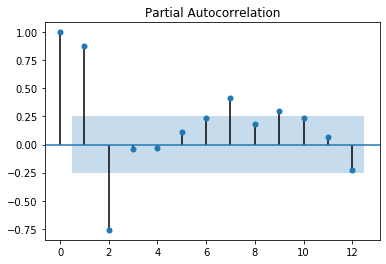

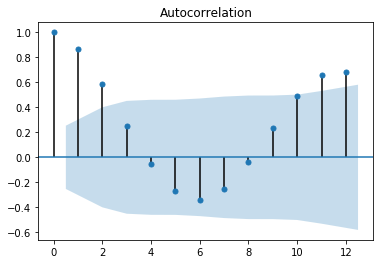

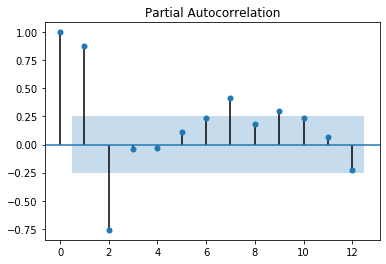

In [22]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(plastic.Sales,lags=12)
tsa_plots.plot_pacf(plastic.Sales,lags=12)

In [23]:
plastic1.set_index('Month',inplace=True)

In [24]:
plastic1.head()

,Sales,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Sales
Month,,,,,,,,,,,,,,,,,
2049-01-01,742,Jan,0,0,0,0,1,0,0,0,0,0,0,0,1,1,6.609349
2049-02-01,697,Feb,0,0,0,1,0,0,0,0,0,0,0,0,2,4,6.546785
2049-03-01,776,Mar,0,0,0,0,0,0,0,1,0,0,0,0,3,9,6.654153
2049-04-01,898,Apr,1,0,0,0,0,0,0,0,0,0,0,0,4,16,6.800170
2049-05-01,1030,May,0,0,0,0,0,0,0,0,1,0,0,0,5,25,6.937314


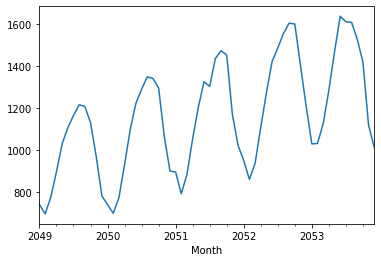

In [43]:
plastic1['Sales'].plot()

In [39]:
#Seasonal AutoRegressive Integrated Moving Average with eXogenous regressors model [SARIMAX]
model=sm.tsa.statespace.SARIMAX(plastic1['Sales'],order=(3, 1, 3),seasonal_order=(1,1,1,12))
results=model.fit()
results.aic

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


519.5564896521742

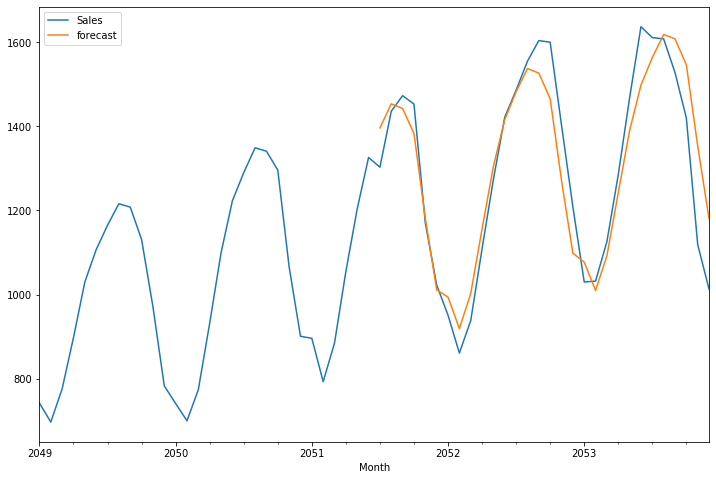

In [40]:
plastic1['forecast']=results.predict(start=30,end=60,dynamic=True)
plastic1[['Sales','forecast']].plot(figsize=(12,8))

In [31]:
from pandas.tseries.offsets import DateOffset
future_dates=[plastic1.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [32]:
future_datest_plastic1=pd.DataFrame(index=future_dates[1:],columns=plastic1.columns)

In [34]:
future_datest_plastic1.head()

,Sales,months,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_squared,log_Sales,forecast
2054-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2054-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2054-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2054-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2054-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
future_plastic1=pd.concat([plastic,future_datest_plastic1])
future_plastic1.head()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Month,Nov,Oct,Sales,Sep,forecast,log_Sales,months,t,t_squared
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jan-49,NaN,NaN,742,NaN,NaN,NaN,Jan,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Feb-49,NaN,NaN,697,NaN,NaN,NaN,Feb,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mar-49,NaN,NaN,776,NaN,NaN,NaN,Mar,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Apr-49,NaN,NaN,898,NaN,NaN,NaN,Apr,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,May-49,NaN,NaN,1030,NaN,NaN,NaN,May,NaN,NaN


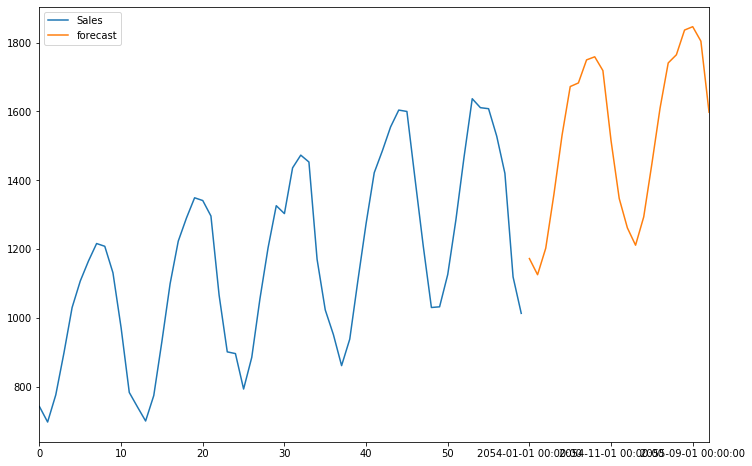

In [36]:
future_plastic1['forecast'] = results.predict(start = 55, end = 83, dynamic= True)  
future_plastic1[['Sales', 'forecast']].plot(figsize=(12, 8))